In [1]:
import cv2 as cv
from IPython.display import Image

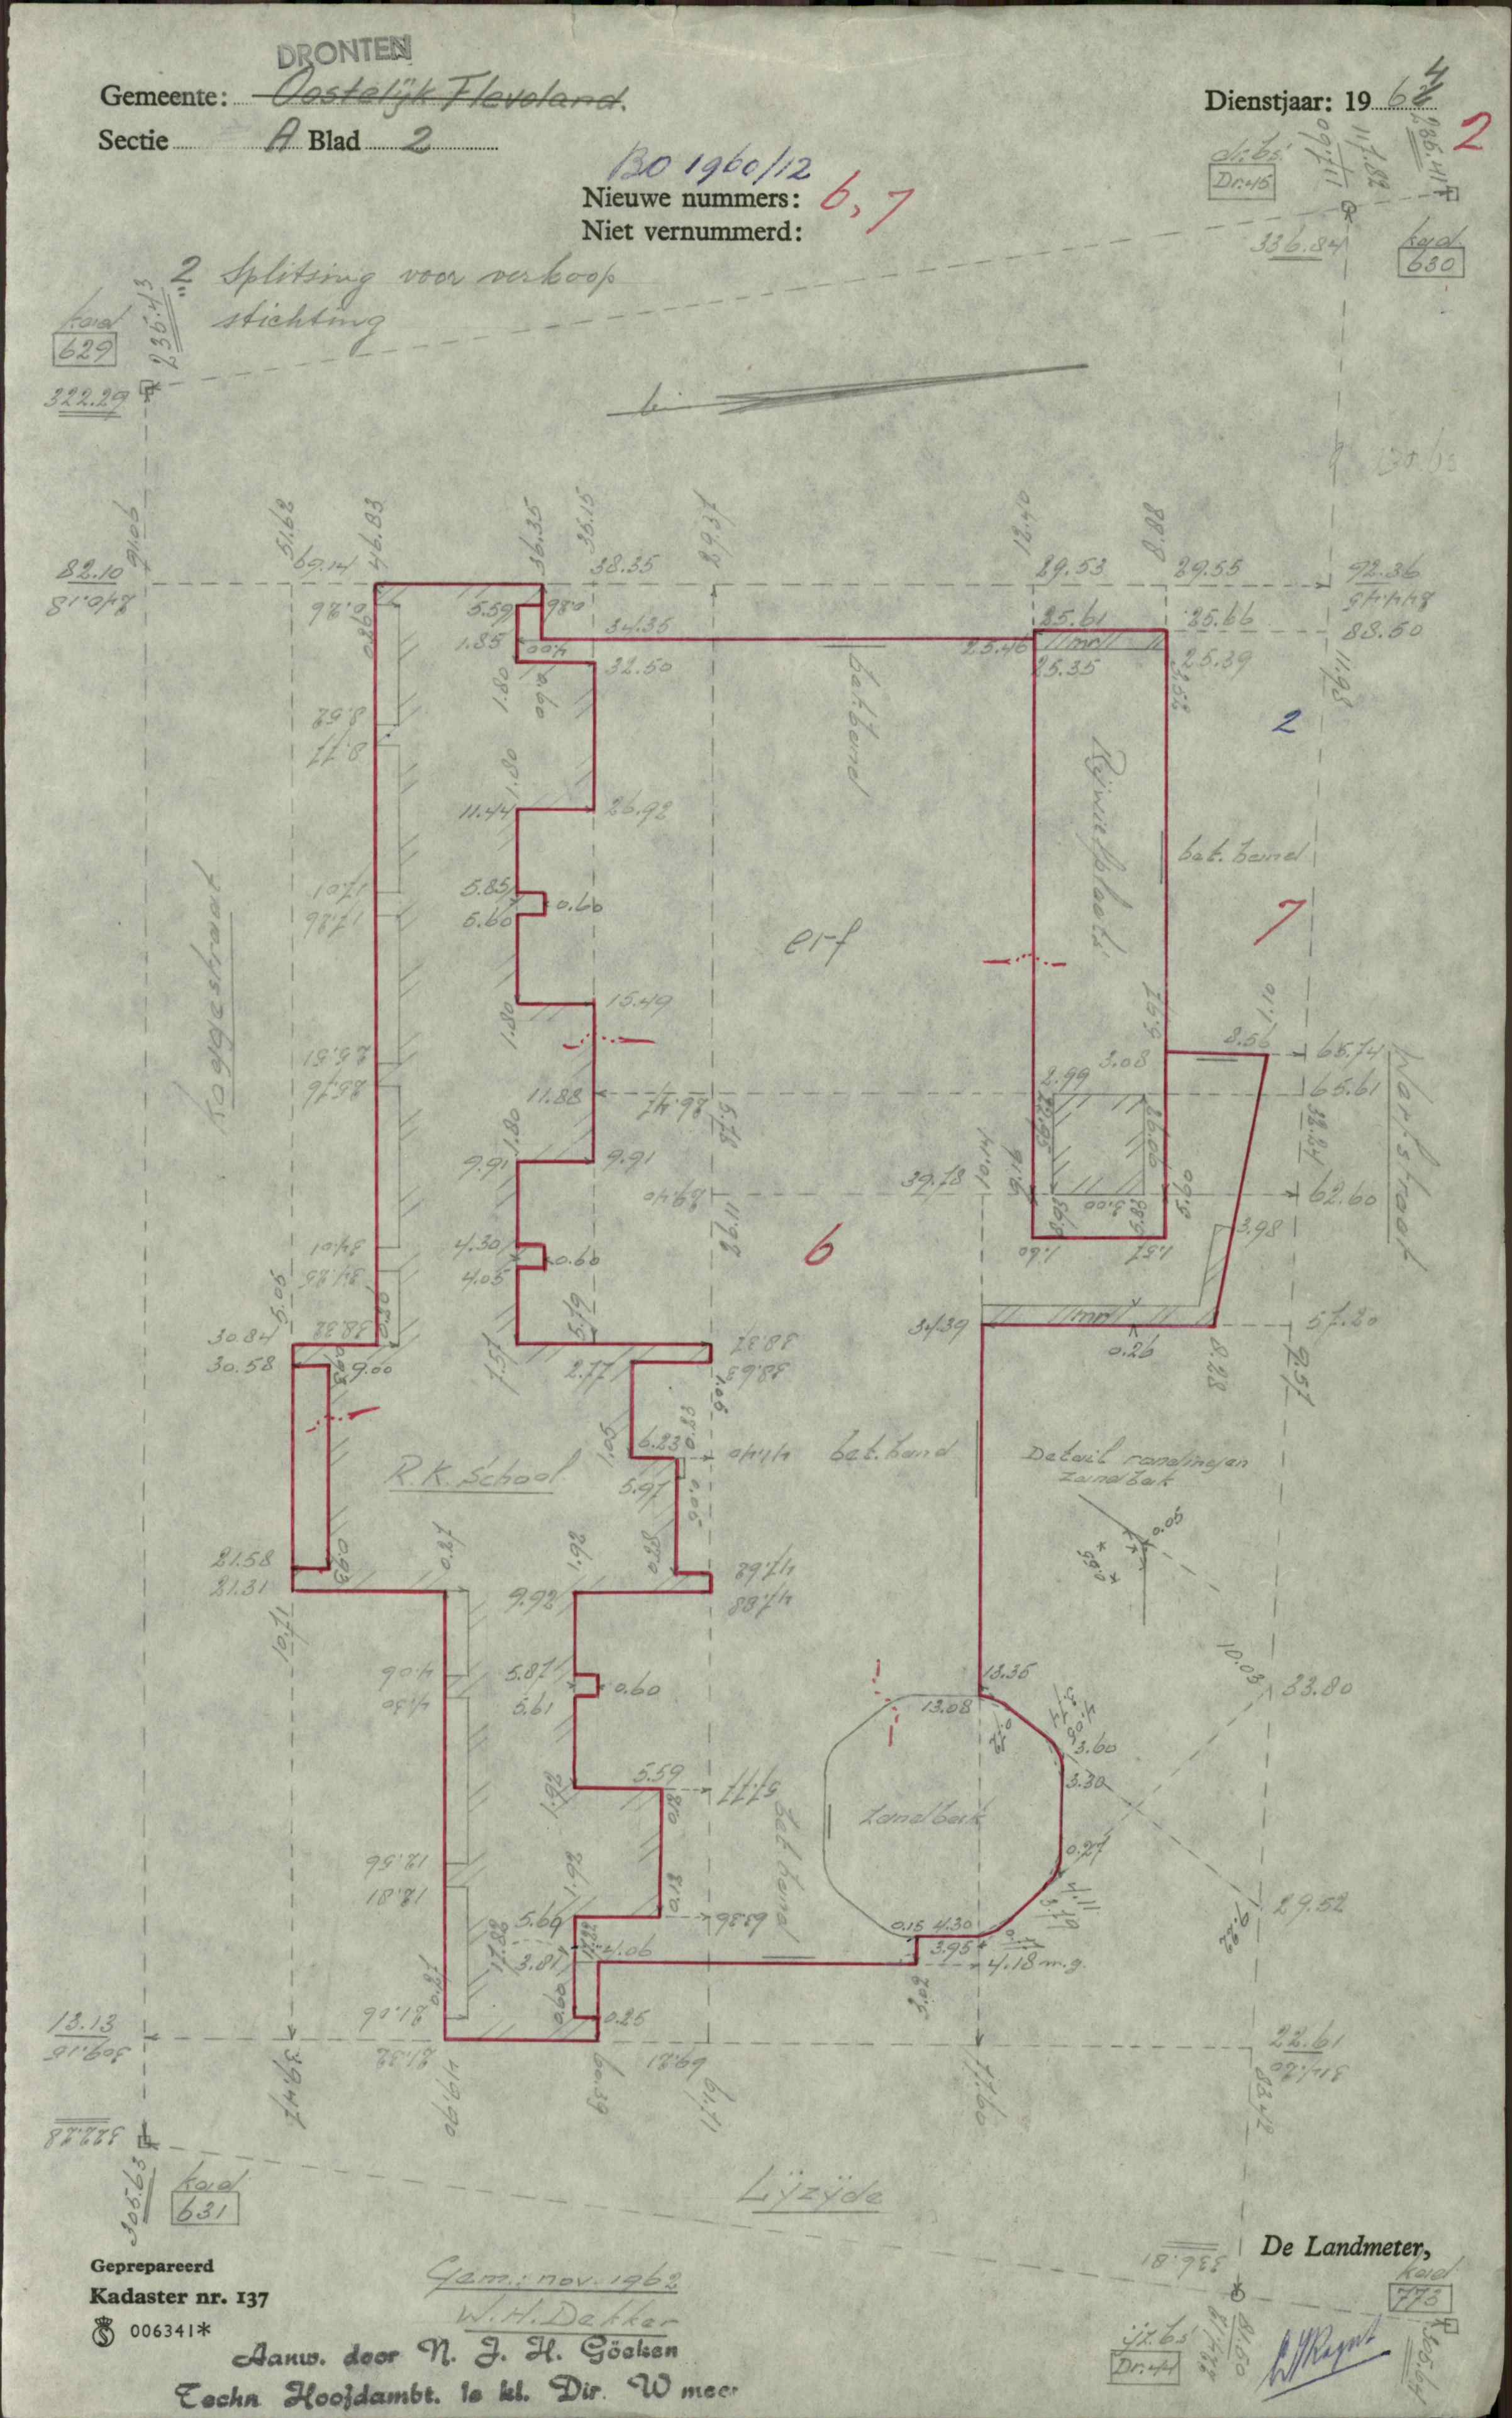

In [4]:
img = Image(filename='img_1.jpg')
img

In [29]:
img = cv.imread('img_1.JPG', 1)
cv.imshow('Image', img)
cv.waitKey(0)
cv.destroyAllWindows()

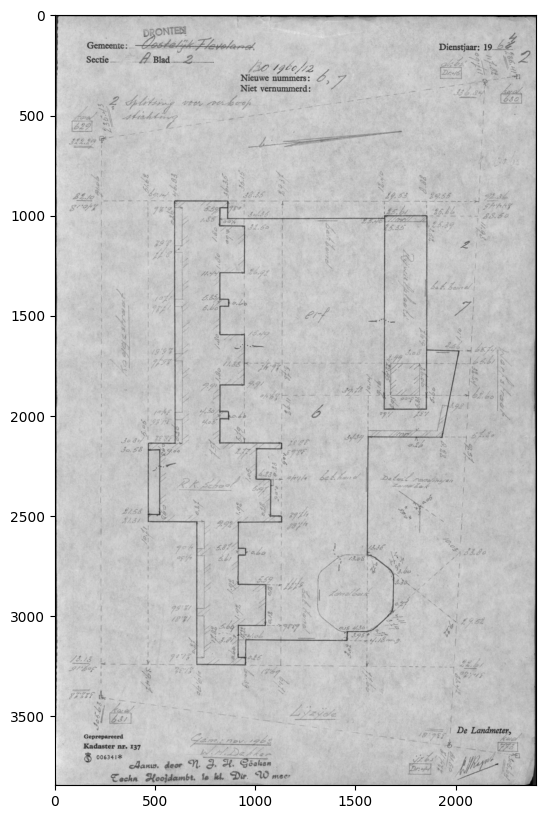

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

In [30]:
av_blur = cv.blur(img,(5,5))

In [31]:
gasu_blur = cv.GaussianBlur(img,(5,5),0)

In [32]:
med_blur = cv.medianBlur(img,5)

In [33]:
bi_filter = cv.bilateralFilter(img,9,75,75)

Text(0.5, 1.0, 'average_blur')

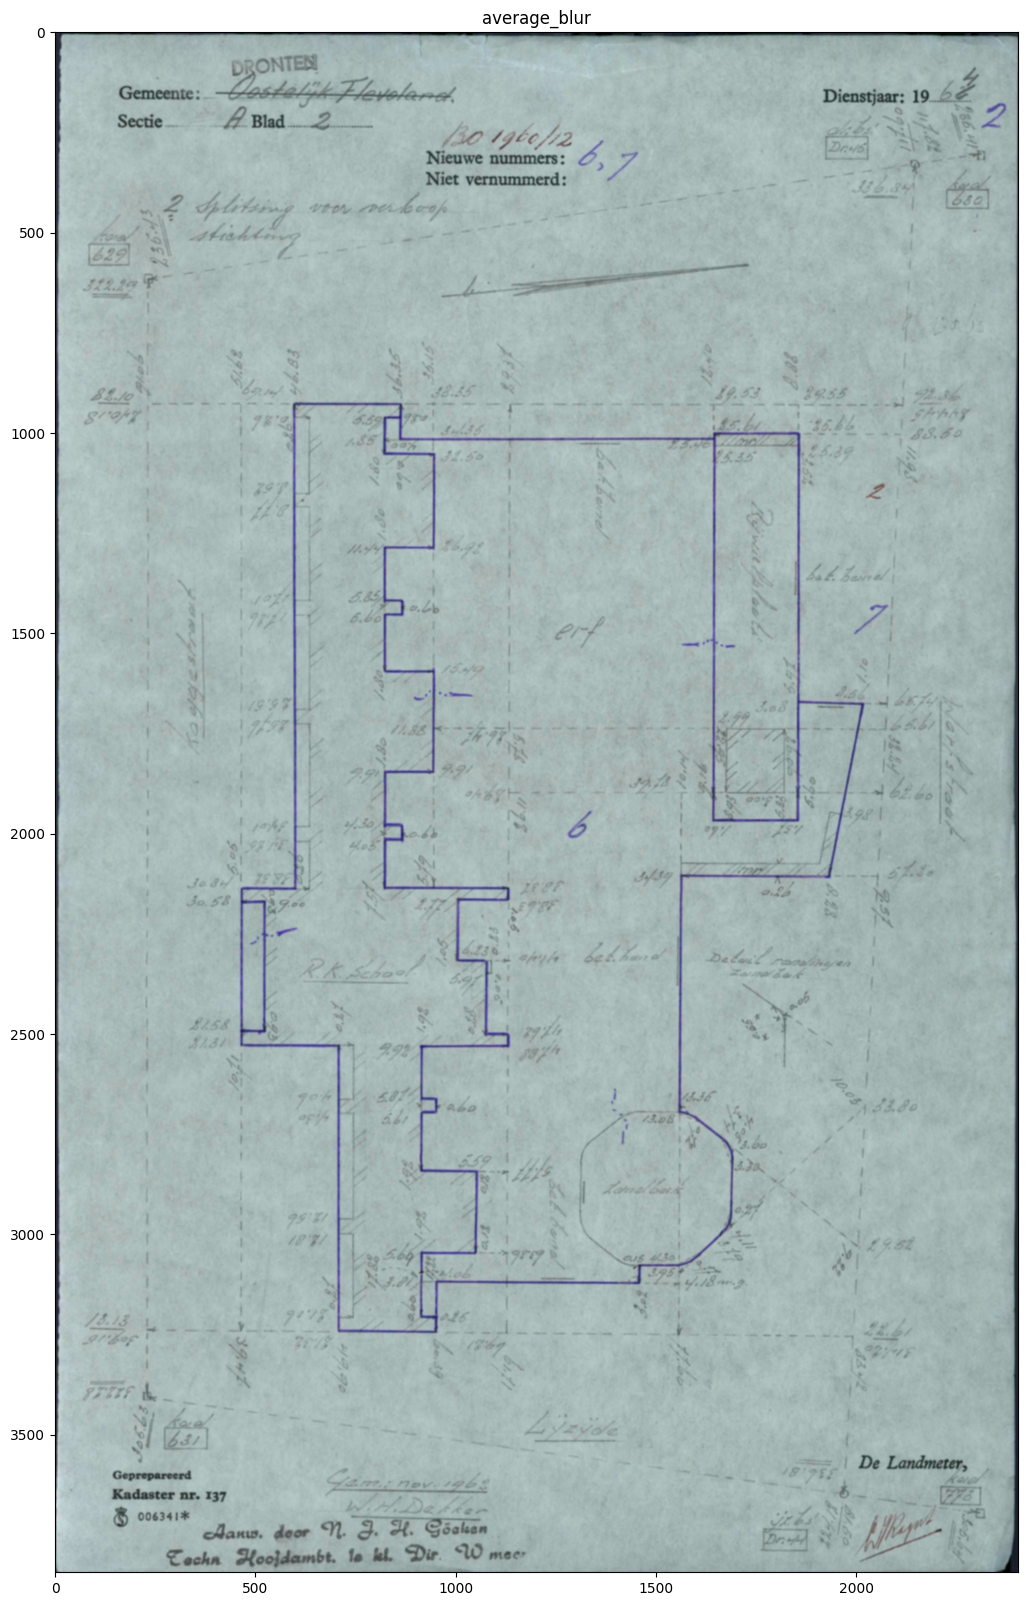

In [34]:
plt.figure(figsize=(20,20))
plt.imshow(av_blur)
plt.title('average_blur')


Text(0.5, 1.0, 'Gaussian Blur')

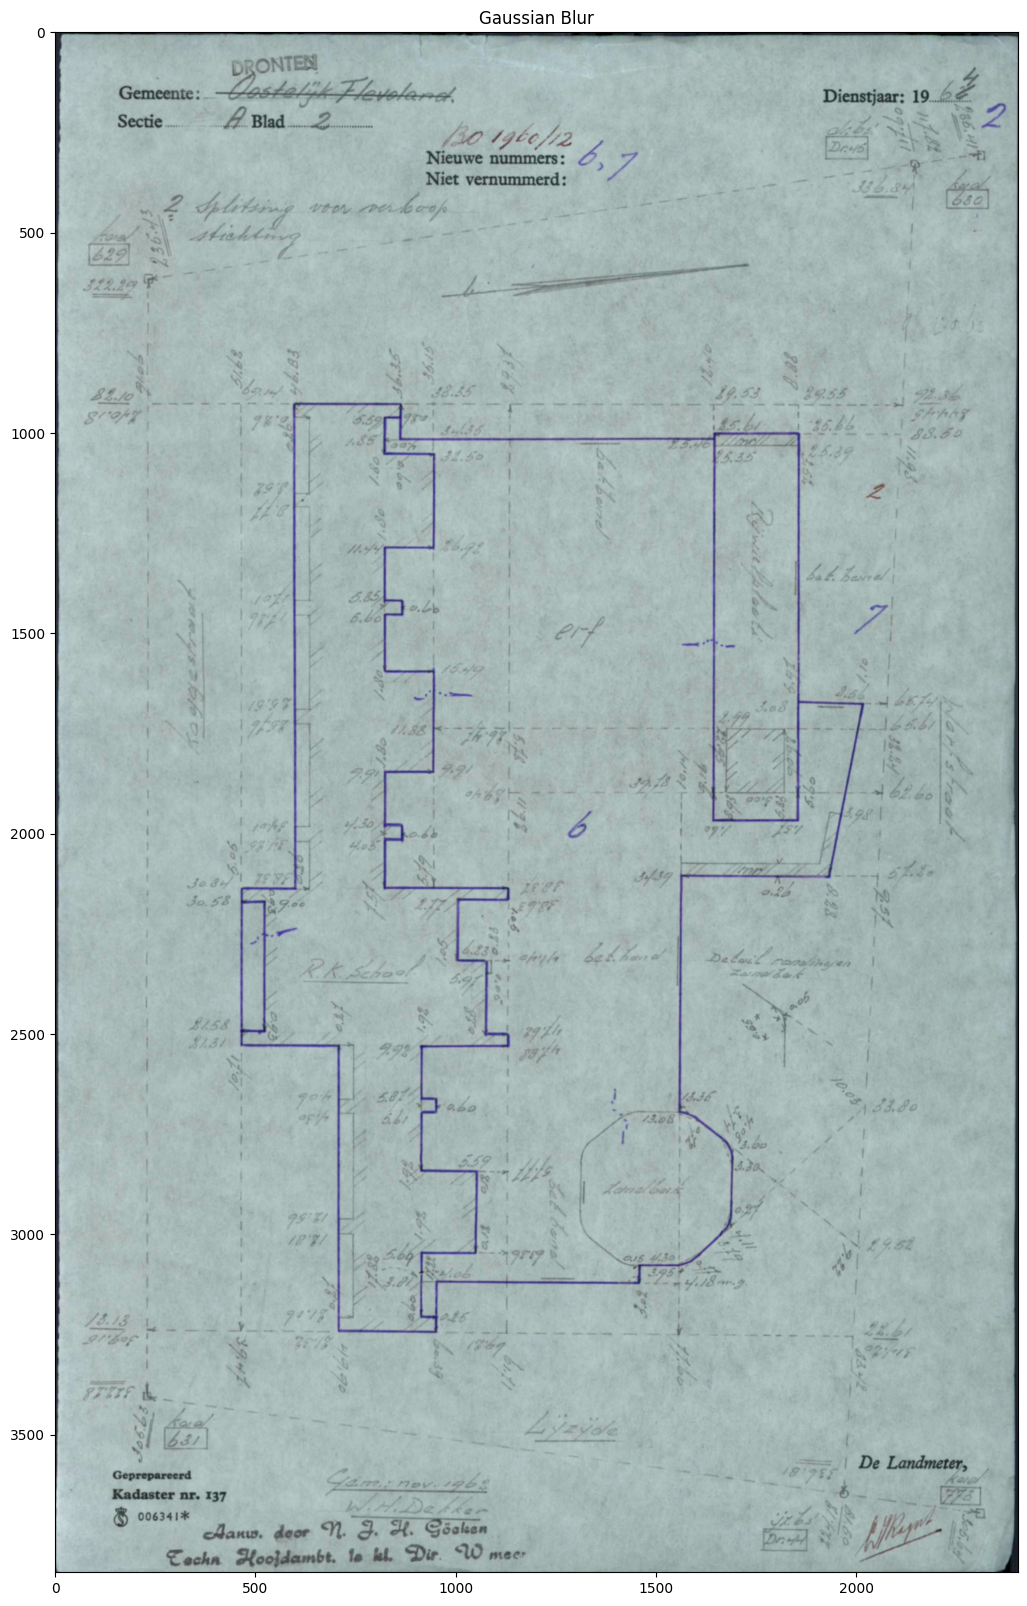

In [35]:
plt.figure(figsize=(20,20))
plt.imshow(gasu_blur)
plt.title('Gaussian Blur')


Text(0.5, 1.0, 'median Blur')

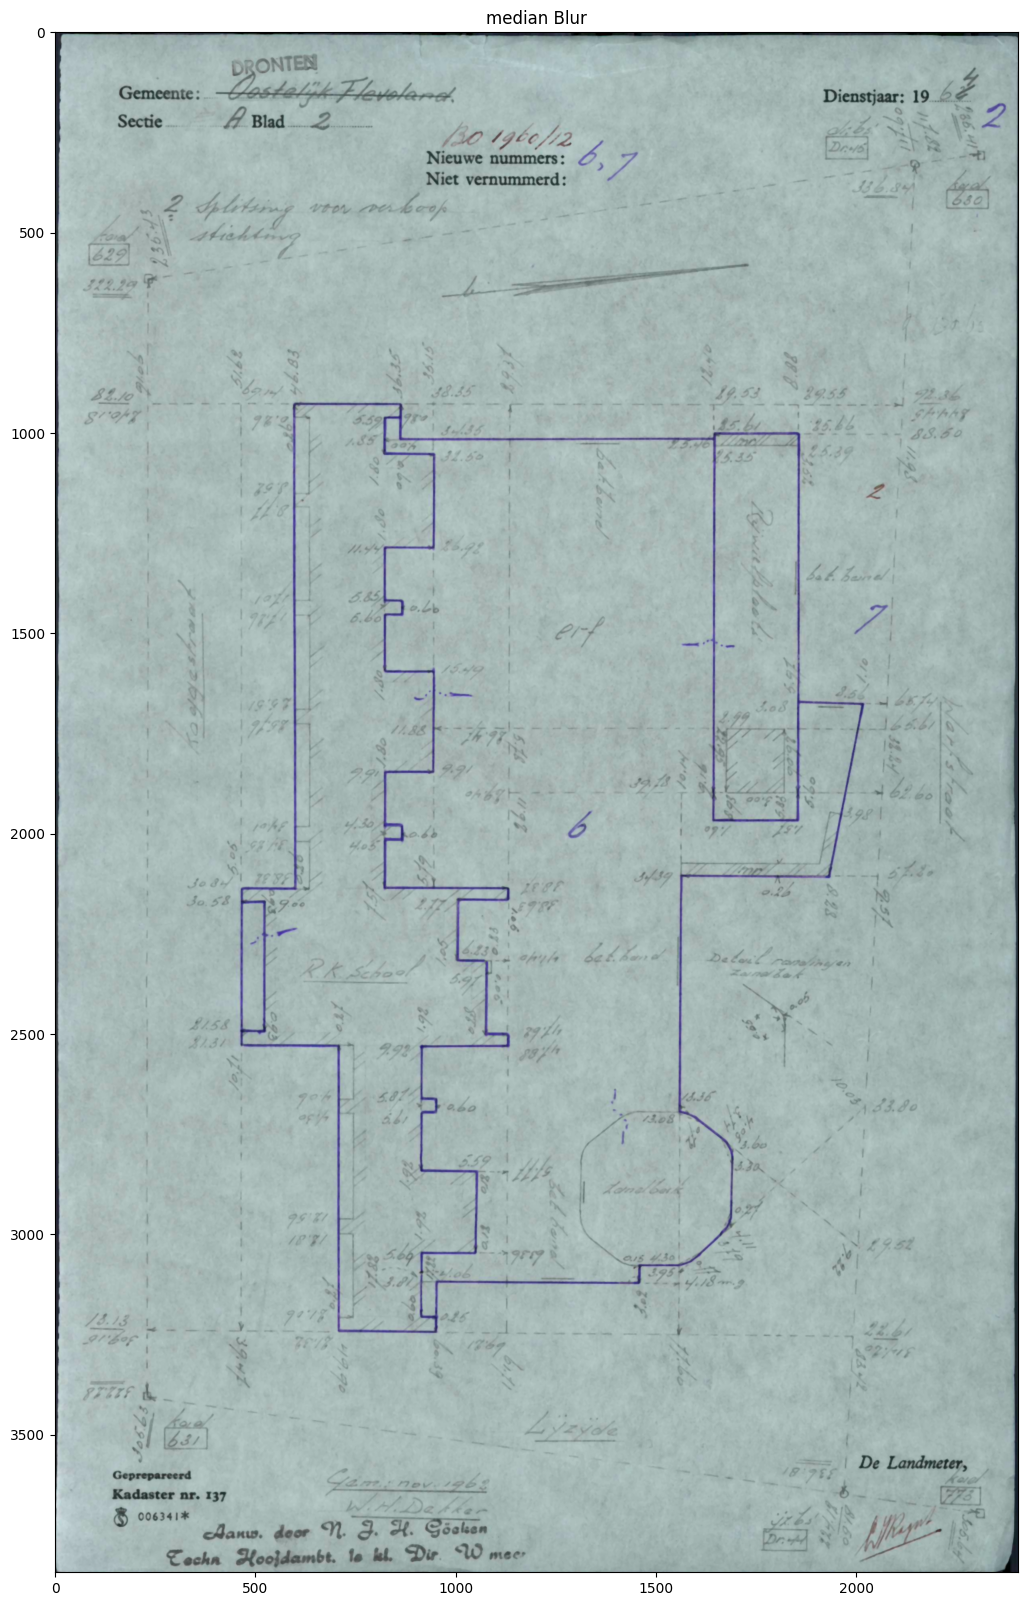

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(med_blur)
plt.title('median Blur')


Text(0.5, 1.0, 'bilateral_filter')

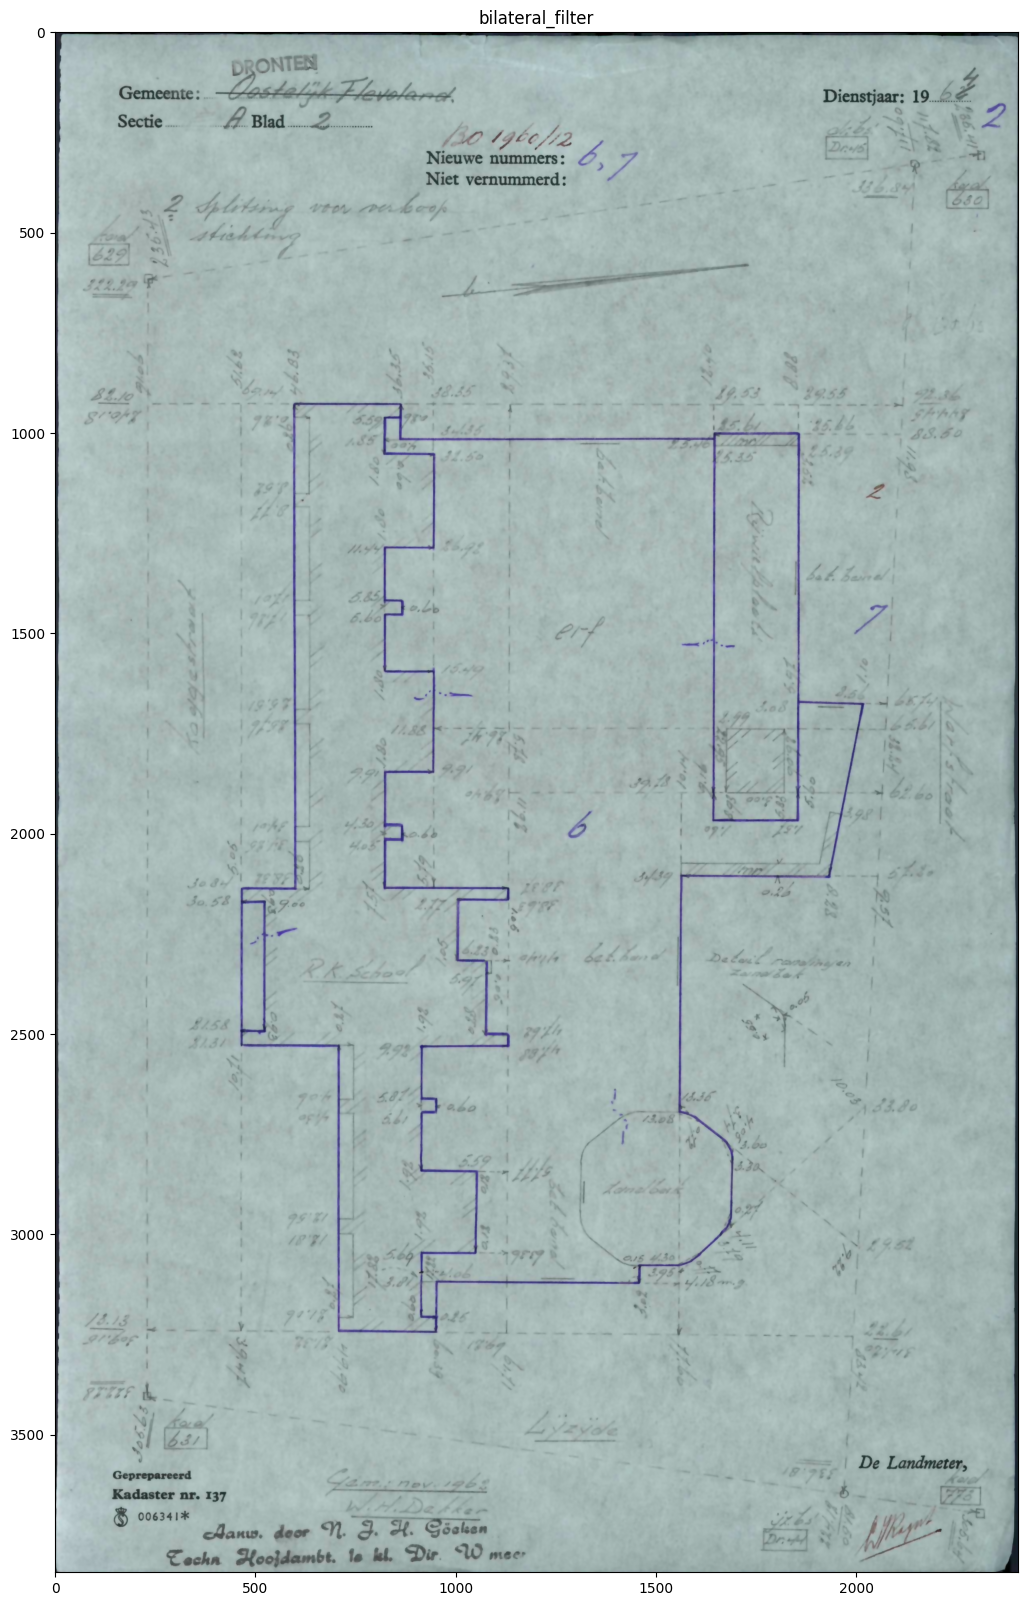

In [37]:
plt.figure(figsize=(20,20))
plt.imshow(bi_filter)
plt.title('bilateral_filter')

In [20]:
print(cv.__version__)

4.11.0


In [39]:
img_1 = cv.imread('img_1.JPG',0)

In [42]:
his_con = cv.equalizeHist(img_1)

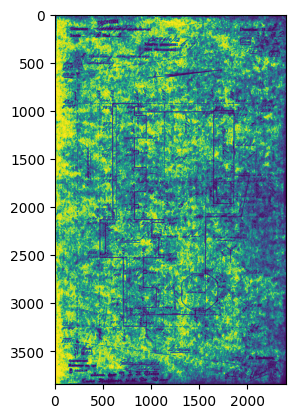

In [44]:
plt.imshow(his_con)

In [52]:
mean_thresh = cv.adaptiveThreshold(img_1,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

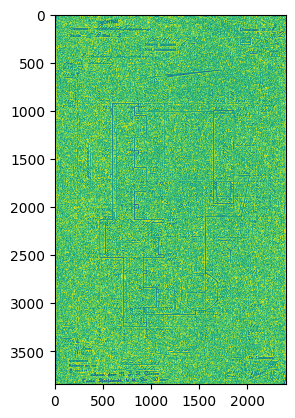

In [53]:
plt.imshow(mean_thresh)

In [54]:
pillow_img = Image.fromarray(mean_thresh)

In [13]:
import pytesseract
from PIL import Image

# Specify the path to the tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Now try to get the version and extract text from an image
print("Tesseract Version:", pytesseract.get_tesseract_version())

Tesseract Version: 5.5.0.20241111


In [14]:
import cv2
import os
import re
import csv
import pytesseract
from easyocr import Reader

In [15]:
def extract_text_regions(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if 10 < w < 300 and 10 < h < 100:
            regions.append((x, y, w, h))
    return regions

In [16]:

def ocr_with_tesseract(region):
    config = "--psm 8 -c tessedit_char_whitelist=0123456789."
    text = pytesseract.image_to_string(region, config=config)
    return text.strip()


In [17]:
def process_image(image_path):
    preprocessed = preprocess_image(image_path)
    regions = extract_text_regions(preprocessed)
    numeric_data = []
    for x, y, w, h in regions:
        cropped = preprocessed[y:y+h, x:x+w]
        text = ocr_with_tesseract(cropped)
        if re.match(r'^\d+(\.\d+)?$', text):
            numeric_data.append(text)
    return numeric_data

In [18]:
def process_images(input_folder, output_csv):
    results = []
    for image_name in os.listdir(input_folder):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, image_name)
            numbers = process_image(image_path)
            results.append((image_name, numbers))
            print(f"Processed {image_name}: {numbers}")
    save_to_csv(results, output_csv)

In [19]:
def save_to_csv(results, output_csv):
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Extracted Numbers"])
        for image_name, numbers in results:
            writer.writerow([image_name, ", ".join(numbers)])

In [20]:
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    binarized = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    cleaned = cv2.morphologyEx(binarized, cv2.MORPH_CLOSE, kernel, iterations=1)
    return cleaned

In [21]:
if __name__ == "__main__":
    input_folder = "input_folder"
    output_csv = "output.csv"
    if not os.path.exists(input_folder):
        print(f"Input folder '{input_folder}' does not exist. Please create it and add images.")
    else:
        process_images(input_folder, output_csv)

Processed img_1.JPG: ['4', '6', '4', '7', '2', '10', '3', '4', '4', '3', '4', '4', '4', '6', '7', '4', '4', '7', '3', '4', '4', '7', '7', '7', '3', '7', '3', '3', '7', '4', '1', '5', '7', '4', '2', '4', '4', '7', '4', '5', '2', '7', '44', '4', '7', '6', '2', '4', '4', '4', '74', '7', '7', '3', '4', '5', '1', '4', '1', '4', '1', '7', '2', '4', '5', '7', '74', '7', '5', '1', '4', '4', '4', '4', '4', '0', '4', '5', '2', '7', '7', '3', '4', '4', '1', '4', '4', '4', '1', '9', '4', '4', '227', '7', '4', '2', '5', '4', '3', '2', '2', '2', '4', '4', '3', '3', '4', '7', '1', '4', '4', '5', '4', '4', '7', '1', '4', '5', '7', '7', '2', '4', '7', '4', '4', '4', '7', '1', '7', '4', '4', '4', '4', '1', '7', '3', '9', '2', '4', '4', '4', '7', '4', '7', '4', '1', '4', '4', '2', '42', '4', '7', '4', '4', '4', '4', '4', '4', '2', '7', '4', '1', '7', '4', '1', '1', '7', '7', '4', '7', '1', '1', '1', '7', '4', '4', '4', '4', '4', '1', '4', '4', '54', '4', '4', '3', '2', '2', '5', '29', '1', '2', '4', '4',

In [4]:
import os
import csv
import re
from easyocr import Reader

def process_image(image_path, reader):
    result = reader.readtext(image_path, detail=0)
    numeric_data = []
    for text in result:
        if re.match(r'^\d+(\.\d+)?$', text):
            numeric_data.append(text)
    return numeric_data

def process_images(input_folder, output_csv):
    reader = Reader(['en'], gpu=True)  # Enable GPU
    results = []
    for image_name in os.listdir(input_folder):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, image_name)
            numbers = process_image(image_path, reader)
            results.append((image_name, numbers))
            print(f"Processed {image_name}: {numbers}")
    save_to_csv(results, output_csv)

def save_to_csv(results, output_csv):
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Extracted Numbers"])
        for image_name, numbers in results:
            writer.writerow([image_name, ", ".join(numbers)])

if __name__ == "__main__":
    input_folder = "input_folder"
    output_csv = "output.csv"
    if not os.path.exists(input_folder):
        print(f"Input folder '{input_folder}' does not exist. Please create it and add images.")
    else:
        process_images(input_folder, output_csv)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteProcessed img_1.JPG: ['2', '862', '2', '7', '630', '2', '0', '5', '3', '3', '0', '8', '4', '38.356', '7921', '2955', '359', '156', '85', '087', '95.35', '0', '72', '6.85', '6', '0', '6', '6', '4', '6574', '16.61', '8', '791', '246', '898', '52', '2.79', '3.00', '4788', '06', '4', '9', '16438', '6', '0', '0.60', '3.38', '1777', '0', '8', '395', '70', '1', '8', '242', '422', '0', '42', '855', '0', '69', '387', '4', '2', '445']
Processed img_2.JPG: ['33', '4', '9', '61', '5', '395', '295', '0', '65', '40', '1', '7', '28', '01', '5', '4', '40', '18', '294', '8', '8', '0', '67', '157', '5', '2', '43', '298', '62', '0', '1.5', '2', '0', '0', '59', '158', '0', '0', '1', '6', '67', '3', '4', '57', '41', '0', '41', '404', '5', '38', '62', '09', '1', '0', '3', '3', '0', '1', '0', '7996', '44', '1996', '1.58', '2', '8', '64', '8', '295']


In [5]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available!")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available. Using CPU.")

GPU is not available. Using CPU.


In [17]:
import cv2
import os
import re
import csv
import pytesseract

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    binarized = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    cleaned = cv2.morphologyEx(binarized, cv2.MORPH_CLOSE, kernel, iterations=1)
    return cleaned

def extract_text_regions(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if 10 < w < 300 and 10 < h < 100:  # Filter regions based on size
            regions.append((x, y, w, h))
    return regions

def ocr_with_tesseract(region):
    config = "--psm 8 -c tessedit_char_whitelist=0123456789"
    text = pytesseract.image_to_string(region, config=config)
    return text.strip()

def group_numbers_by_position(regions, preprocessed):
    grouped_data = []
    regions = sorted(regions, key=lambda r: (r[1], r[0]))  # Sort by y (top-to-bottom), then x (left-to-right)
    current_group = []
    prev_y = -1

    for x, y, w, h in regions:
        cropped = preprocessed[y:y+h, x:x+w]
        text = ocr_with_tesseract(cropped)

        if re.match(r'^\d+$', text):  # Match only whole numbers
            # Group numbers based on proximity
            if prev_y != -1 and abs(y - prev_y) > 50:  # Threshold for vertical grouping
                grouped_data.append("".join(current_group))  # Add current group to result
                current_group = []

            current_group.append(text)
            prev_y = y

    if current_group:
        grouped_data.append("".join(current_group))  # Add the last group

    return grouped_data

def process_image(image_path):
    preprocessed = preprocess_image(image_path)
    regions = extract_text_regions(preprocessed)
    grouped_numbers = group_numbers_by_position(regions, preprocessed)
    return grouped_numbers

def process_images(input_folder, output_csv):
    results = []
    for image_name in os.listdir(input_folder):
        if image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(input_folder, image_name)
            numbers = process_image(image_path)
            results.append((image_name, numbers))
            print(f"Processed {image_name}: {numbers}")
    save_to_csv(results, output_csv)

def save_to_csv(results, output_csv):
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Image Name", "Grouped Numbers"])
        for image_name, numbers in results:
            writer.writerow([image_name, " | ".join(numbers)])  # Join groups with a separator

if __name__ == "__main__":
    input_folder = "input_folder"
    output_csv = "output.csv"
    if not os.path.exists(input_folder):
        print(f"Input folder '{input_folder}' does not exist. Please create it and add images.")
    else:
        process_images(input_folder, output_csv)


Processed img_1.JPG: ['4131117504512105824', '45542444121295227344544414444471112274771144171472444444447442244147447444429', '371', '4', '44471', '74', '4', '44742775417445', '441743', '3442223452', '4722744449144441443772574', '04', '4444157747754271414154', '377745445426744472547442475147337', '37774437447644434431027464']
Processed img_2.JPG: ['735', '71411', '74898147943', '70471614451447404', '7747', '2742', '9', '3722267', '75275', '7', '44', '7', '4529', '4', '3444', '471', '781', '2', '4', '3', '235']
